Missing values handled. Shape: (20538, 37)


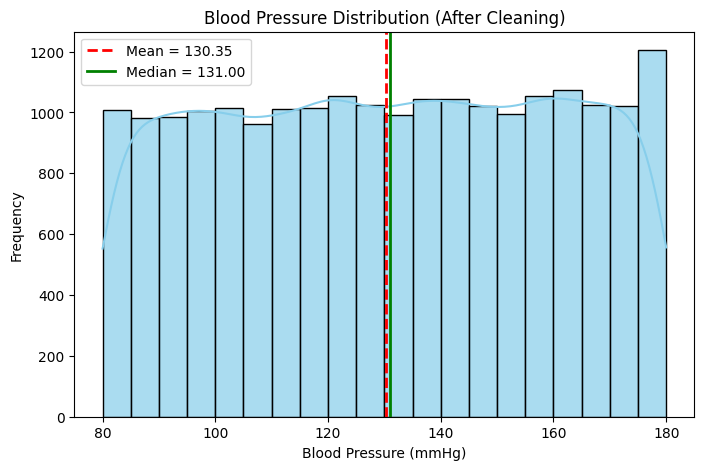

(20538, 37)
['age_of_the_patient', 'blood_pressure_mm_hg_', 'specific_gravity_of_urine', 'albumin_in_urine', 'sugar_in_urine', 'random_blood_glucose_level_mg_dl_', 'blood_urea_mg_dl_', 'serum_creatinine_mg_dl_', 'sodium_level_meq_l_', 'potassium_level_meq_l_', 'hemoglobin_level_gms_', 'packed_cell_volume_', 'white_blood_cell_count_cells_cumm_', 'red_blood_cell_count_millions_cumm_', 'estimated_glomerular_filtration_rate_egfr_', 'urine_protein_to_creatinine_ratio', 'urine_output_ml_day_', 'serum_albumin_level', 'cholesterol_level', 'parathyroid_hormone_pth_level', 'serum_calcium_level', 'serum_phosphate_level', 'body_mass_index_bmi_', 'cystatin_c_level', 'c_reactive_protein_crp_level', 'interleukin_6_il_6_level', 'red_blood_cells_in_urine', 'pus_cells_in_urine', 'pus_cell_clumps_in_urine', 'bacteria_in_urine', 'hypertension_yes_no_', 'diabetes_mellitus_yes_no_', 'coronary_artery_disease_yes_no_', 'anemia_yes_no_', 'family_history_of_chronic_kidney_disease', 'urinary_sediment_microscopy_

In [1]:

# === Missing Values & Cleaning ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Setup ===
df = pd.read_csv("C:\\Users\\TUF\\OneDrive\\Desktop\\SLIIT 2Y1S\\AI and ML\\Project\\AIML_Project\\kidney_disease_dataset(S).csv")
df.columns = df.columns.str.strip().str.lower().str.replace(r'[^\w]+', '_', regex=True)

# Keep only useful columns (clinically relevant)
useful_cols = [
    'age_of_the_patient','blood_pressure_mm_hg_','specific_gravity_of_urine','albumin_in_urine',
    'sugar_in_urine','random_blood_glucose_level_mg_dl_','blood_urea_mg_dl_','serum_creatinine_mg_dl_',
    'sodium_level_meq_l_','potassium_level_meq_l_','hemoglobin_level_gms_','packed_cell_volume_',
    'white_blood_cell_count_cells_cumm_','red_blood_cell_count_millions_cumm_',
    'estimated_glomerular_filtration_rate_egfr_','urine_protein_to_creatinine_ratio','urine_output_ml_day_',
    'serum_albumin_level','cholesterol_level','parathyroid_hormone_pth_level','serum_calcium_level',
    'serum_phosphate_level','body_mass_index_bmi_','cystatin_c_level','c_reactive_protein_crp_level',
    'interleukin_6_il_6_level','red_blood_cells_in_urine','pus_cells_in_urine','pus_cell_clumps_in_urine',
    'bacteria_in_urine','hypertension_yes_no_','diabetes_mellitus_yes_no_','coronary_artery_disease_yes_no_',
    'anemia_yes_no_','family_history_of_chronic_kidney_disease','urinary_sediment_microscopy_results','target'
]
df = df[useful_cols]

# === Preprocessing ===
num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop duplicates
df = df.drop_duplicates()

print("Missing values handled. Shape:", df.shape)

# === EDA Visualization: Blood Pressure ===
bp = df["blood_pressure_mm_hg_"]

plt.figure(figsize=(8,5))
sns.histplot(bp, bins=20, kde=True, color="skyblue", edgecolor="black", alpha=0.7)

# Add mean and median lines
plt.axvline(bp.mean(), color='red', linestyle='--', linewidth=2, label=f"Mean = {bp.mean():.2f}")
plt.axvline(bp.median(), color='green', linestyle='-', linewidth=2, label=f"Median = {bp.median():.2f}")

plt.title("Blood Pressure Distribution (After Cleaning)")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(df.shape)        # shows number of rows and columns
print(df.columns.tolist())  # lists all column names

df.head(10)
df.isnull().sum()
df.info()